## Exercise 1-1
Solve the regression using linear algebra

In [29]:
import numpy as np

# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

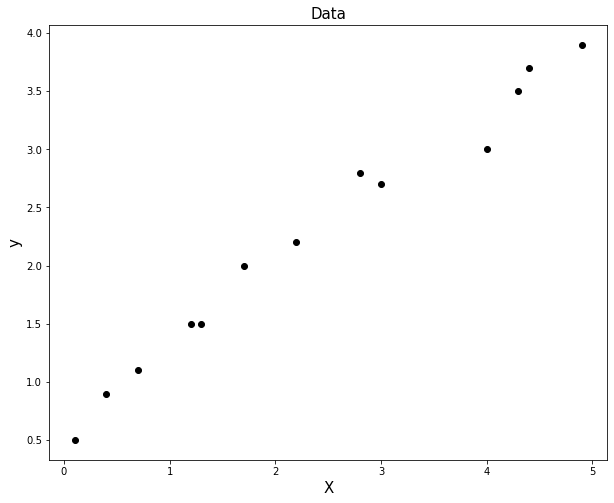

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Data', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.plot(x, y, 'ko')

In [31]:
m = y.shape[0]
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print(theta)

[[0.65306531]
 [0.67129519]]


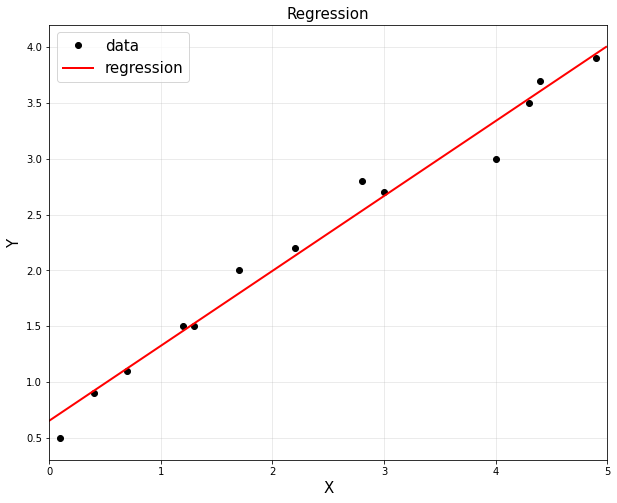

In [32]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0,0] + theta[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

## Exercise 1-2
Use CVXPY optimization (least squared method)

In [33]:
import cvxpy as cvx

theta2 = cvx.Variable((2, 1))
obj = cvx.Minimize(cvx.norm(A*theta2-y, 2))
cvx.Problem(obj, []).solve()

C:\Users\koun0\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


0.5459958913413148

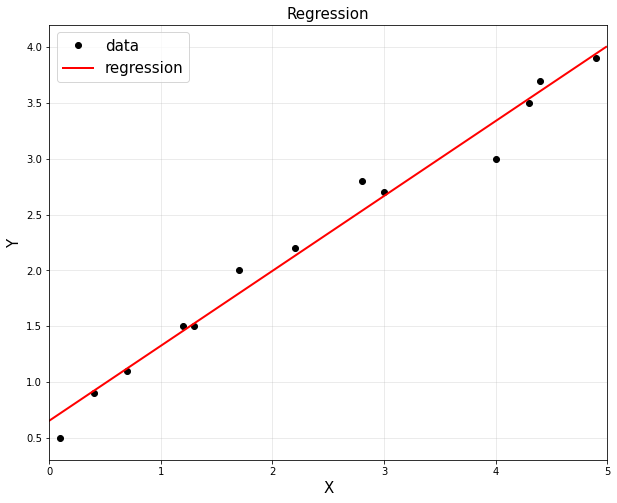

In [34]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta2.value[0,0] + theta2.value[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

## Exercise 2
Solve the nonlinear regression usin glinear algebra for y = -2x^3 -3x^2 +2x -8 +epsilon

In [35]:
n = 100
x = -8 + 15*np.random.rand(n, 1)
noise = 100*np.random.randn(n, 1)
y = -2*x**3 -3*x**2 +2*x -8 +noise

In [36]:
A = np.hstack([x**0, x, x**2, x**3])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

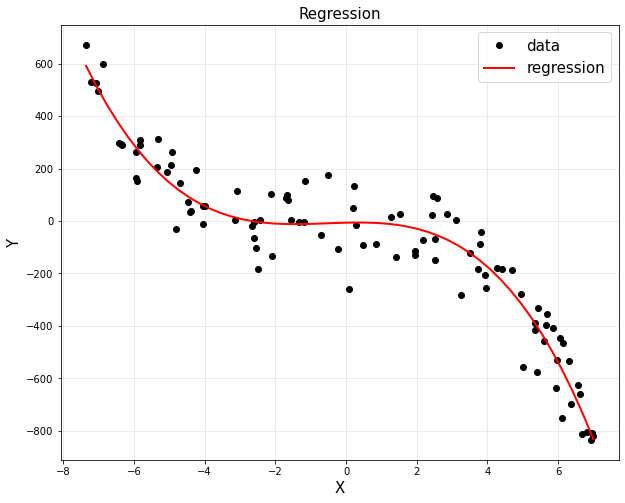

In [37]:
plt.figure(figsize=(10, 8))
plt.title("Regression", fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'ko', label="data")

# to plot a straight line (fitted line)
xp = np.linspace(np.min(x), np.max(x))
# yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2 + theta[3,0]*xp**3

yp = np.zeros_like(xp)

for i in range(4):
    yp += theta[i, 0] * (xp ** i)

plt.plot(xp, yp, 'r', linewidth=2, label="regression")
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

## Exercise 2-2
Solve the problems

In [38]:
m = np.shape(x)[0]
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))

A = np.hstack([np.ones([m, 1]), x, x**2, x**3, x**4, x**5])

theta3 = cvx.Variable((6, 1))
obj = cvx.Minimize(cvx.sum_squares(A @ theta3 - y))
prob = cvx.Problem(obj)
result = prob.solve()

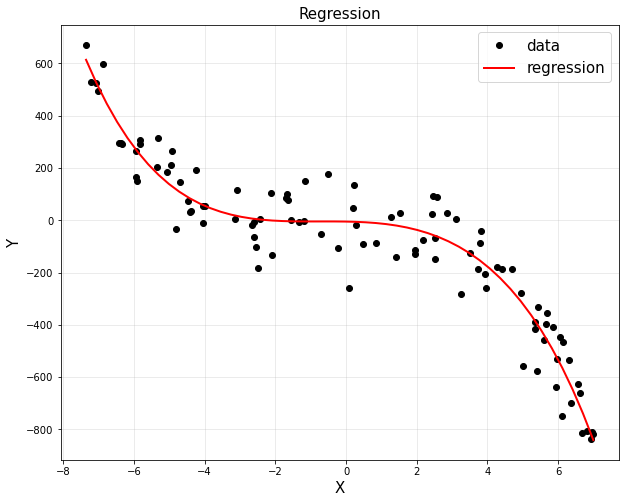

In [39]:
plt.figure(figsize=(10, 8))
plt.title("Regression", fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'ko', label="data")

# to plot a straight line (fitted line)
xp = np.linspace(np.min(x), np.max(x))
# yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2 + theta[3,0]*xp**3

yp = np.zeros_like(xp)

for i in range(6):
    yp += theta3.value[i, 0] * (xp ** i)

plt.plot(xp, yp, 'r', linewidth=2, label="regression")
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()